In [1]:
import numpy as np
import xlrd
from landlab.components import Radiation     # radiation component

from landlab import RasterModelGrid
from landlab.components import PotentialEvapotranspiration    #Potential Evapotranspiration component 

from landlab.io import read_esri_ascii
from landlab.plot import imshow_grid
from landlab.plot.video_out import VideoPlotter

%matplotlib inline


#from landlab.plot.imshow import imshow_grid
import matplotlib.pyplot as plt

plt.show()

In [2]:
(watershed,z)=read_esri_ascii('Hugo_ws_10m.asc', name='topographic__elevation')

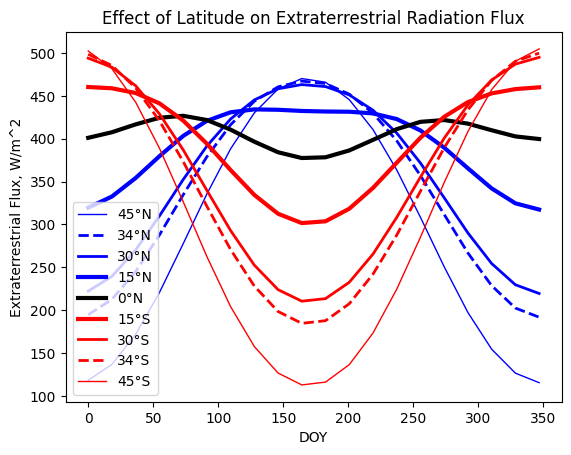

In [3]:
latitude_buffer = [45, 34, 30, 15, 0, -15, -30, -34, -45]
linewidth_buffer = [1, 2, 2, 3, 3, 3, 2, 2, 1]
color_buffer = ['blue', 'blue', 'blue', 'blue', 'black', 'red', 'red', 'red', 'red']
linestyle_buffer = ['solid', 'dashed', 'solid', 'solid', 'solid', 'solid', 'solid', 'dashed', 'solid']


doy = np.arange(0, 1.0, 0.05)
incoming_shortwave_field = np.ndarray(shape=(9, len(doy)))

rad = Radiation(watershed, method='Grid', latitude=40.0667, albedo=0.12,  current_time=0.0, opt_airmass=2.0, clearsky_turbidity=2.0)

for lat_index in range(len(latitude_buffer)):
    rad._latitude = latitude_buffer[lat_index]
    ct_index = 0
    for ct in doy:
        rad._current_time = ct
        rad.update()
        incoming_shortwave_field[lat_index][ct_index] = np.average(rad._cell_values["radiation__extraterrestrial_flux"])
        ct_index += 1

fig, doy_curves = plt.subplots()

doy_curves.set_xlabel("DOY")
doy_curves.set_ylabel("Extraterrestrial Flux, W/m^2")
doy_curves.set_title("Effect of Latitude on Extraterrestrial Radiation Flux")

for lat_index in range(len(latitude_buffer)):
    doy_curves.plot(np.multiply(doy, 365), incoming_shortwave_field[lat_index],
                    color=color_buffer[lat_index], linestyle=linestyle_buffer[lat_index],
                    linewidth=linewidth_buffer[lat_index])

legend_buff = []
for lb in latitude_buffer:
    temp = (str(np.abs(lb)) + str("°N" if lb >= 0 else "°S"))
    legend_buff.append(temp)

doy_curves.legend(legend_buff)

plt.show()